### Estimating Demand with Statsmodels

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('mp3clean.csv')
data.head()

,Unnamed: 0,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount,treat,age
0,1198,M,Partial College,Professional,M,70000,17242.9425,926.4675,1,70
1,11930,S,Bachelors,Professional,F,70000,11975.9090,631.7605,1,55
2,3845,S,Graduate Degree,Professional,F,60000,8394.6440,438.6660,1,56
3,14508,M,Bachelors,Professional,M,60000,317.9470,41.9930,1,55
4,13573,S,Partial College,Manual,M,20000,313.0180,61.4420,1,45


In [5]:
data['treat'] = data['treat'].map({1:'Yes',0:'No'})

In [6]:
data.describe()

,Unnamed: 0,YearlyIncome,TotalSales,TotalDiscount,age
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000
mean,10073.578187,57897.503285,3350.985625,180.886006,60.632063
std,5421.080678,29413.196045,5744.614013,304.239832,10.425527
min,4.000000,10000.000000,0.000000,0.000000,42.000000
25%,5489.750000,40000.000000,119.980000,0.000000,53.000000
50%,10469.000000,60000.000000,225.115400,20.996500,59.000000
75%,14711.000000,70000.000000,3735.068125,194.052125,67.000000
max,18596.000000,170000.000000,24288.384500,1293.115500,95.000000


In [7]:
data2 = data[data['TotalSales']>0]

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1521
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1521 non-null   int64  
 1   MaritalStatus  1521 non-null   object 
 2   Education      1521 non-null   object 
 3   Occupation     1521 non-null   object 
 4   Gender         1521 non-null   object 
 5   YearlyIncome   1521 non-null   int64  
 6   TotalSales     1521 non-null   float64
 7   TotalDiscount  1521 non-null   float64
 8   treat          1521 non-null   object 
 9   age            1521 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 130.7+ KB


In [9]:
reg2 = smf.ols(formula = 'np.log(TotalSales) ~ MaritalStatus + np.log(YearlyIncome)  + np.log(age) + Occupation + Education + treat',
               data=data2 ).fit(cov_type = 'HC3')

In [10]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(TotalSales)   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     150.5
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          1.41e-247
Time:                        08:09:51   Log-Likelihood:                -2758.1
No. Observations:                1521   AIC:                             5542.
Df Residuals:                    1508   BIC:                             5612.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

The results of the regression shows that sales discount has a great effect on sales.  For 1% increase in sales discount, total sales revenue increases by more than 100 per cent. Occupational category also had a statistical significant impact on sales revenue.  Those in Management category have a 22 % probability of increasing sales revenue more than those in clerical group.  This is also similar with those in Manual, Professional , and Skilled Manual.  

Income has an inverse relationship with sales.

Similarly, those in educational categories of Graduate Degree, Partial College and Partial High School have higher probability of purchase more than those in the Bachelors group, while those in High School also have a higher probability of purchase but was found to be non-significant.

Marital status also had an impact on sales as singles have a higher probability of purchase more than the married.  

Age does not have a significant impact on sales revenue.

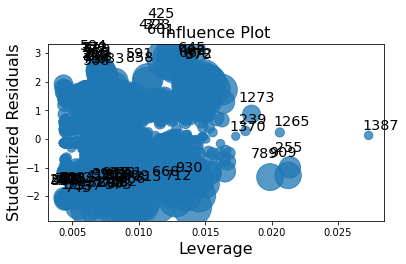

In [11]:
fig = sm.graphics.influence_plot(reg2, criterion="cooks")
fig.tight_layout(pad=2.0)

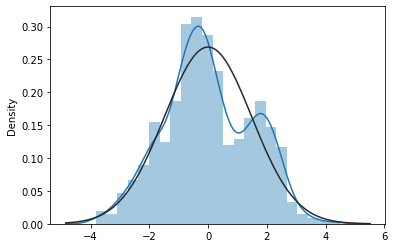

In [13]:
from scipy import stats
sns.distplot(reg2.resid,fit=stats.norm);

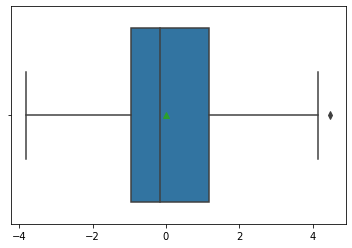

In [14]:
sns.boxplot(reg2.resid,showmeans=True);

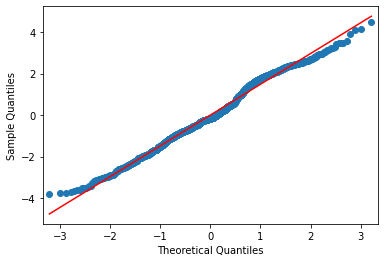

In [15]:
sm.qqplot(reg2.resid,line='s');